# Plots to analyze posterior

In [1]:
import os, sys
os.chdir('/Users/dananjayaliyanage/git/observables/vah_design/emulation')
sys.path.append('/Users/dananjayaliyanage/git/surmise/')

In [2]:
from plotting import *
from priors import xlimits

In [3]:
post_df = pd.read_csv('PCSK_posterior.csv')
post_df.shape



(1000, 15)

In [4]:
post_df.columns = model_param_dsgn

In [5]:
post_df.shape

(1000, 15)

No handles with labels found to put in legend.


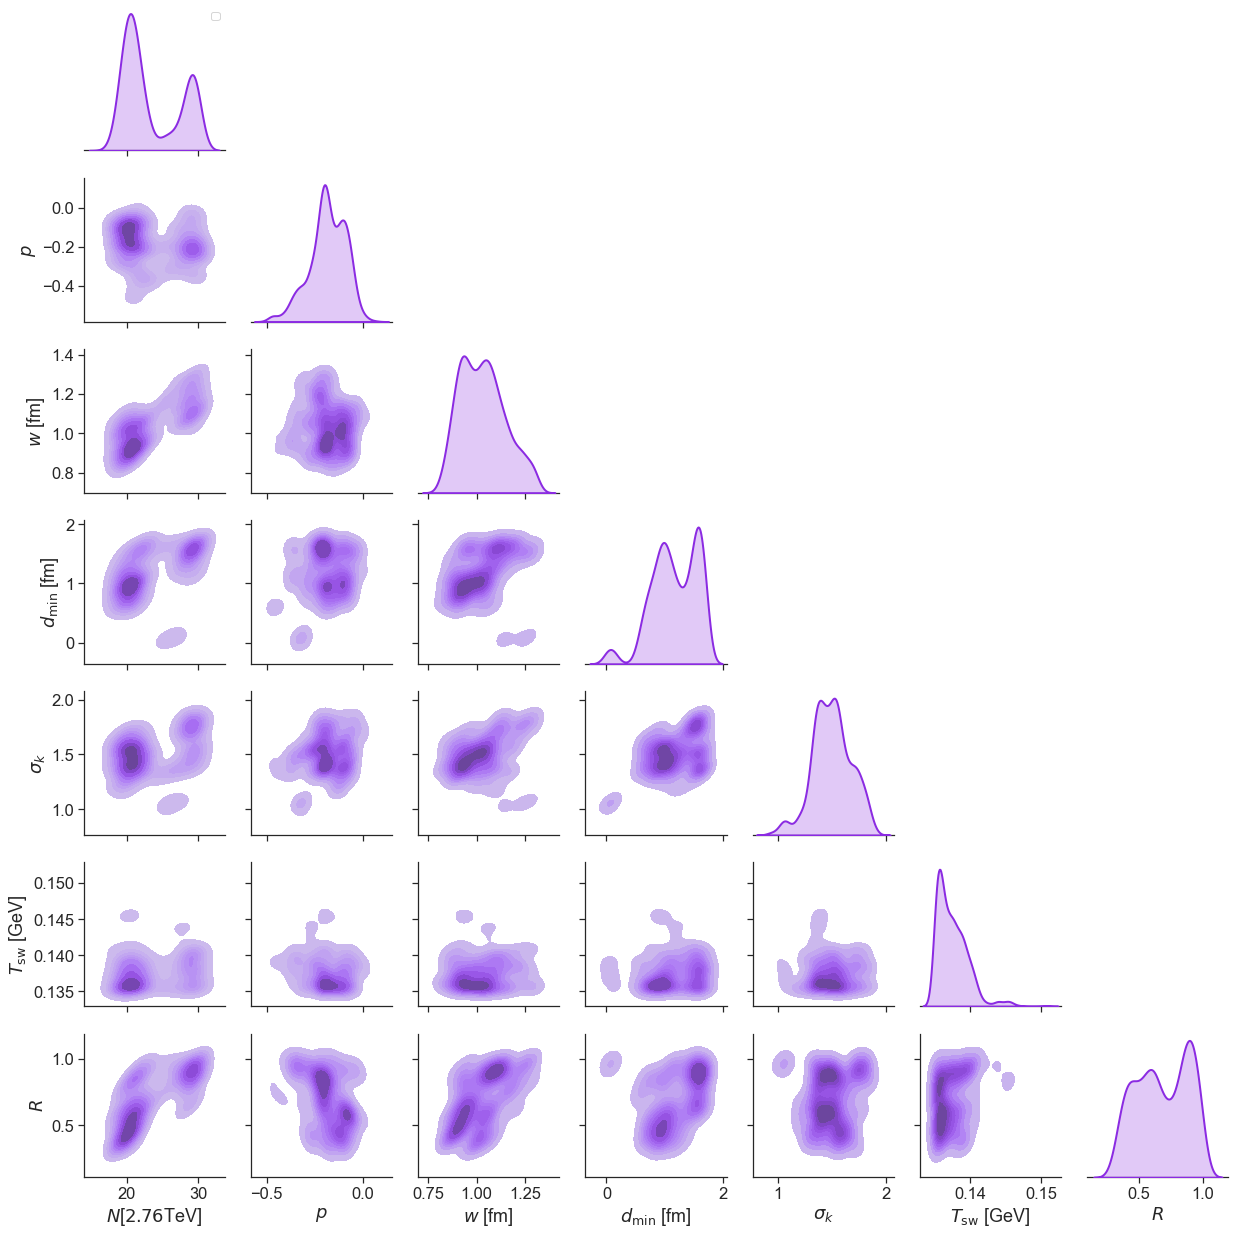

In [6]:
plot_corner_no_viscosity(post_df,'PCSK',1000,1)

No handles with labels found to put in legend.


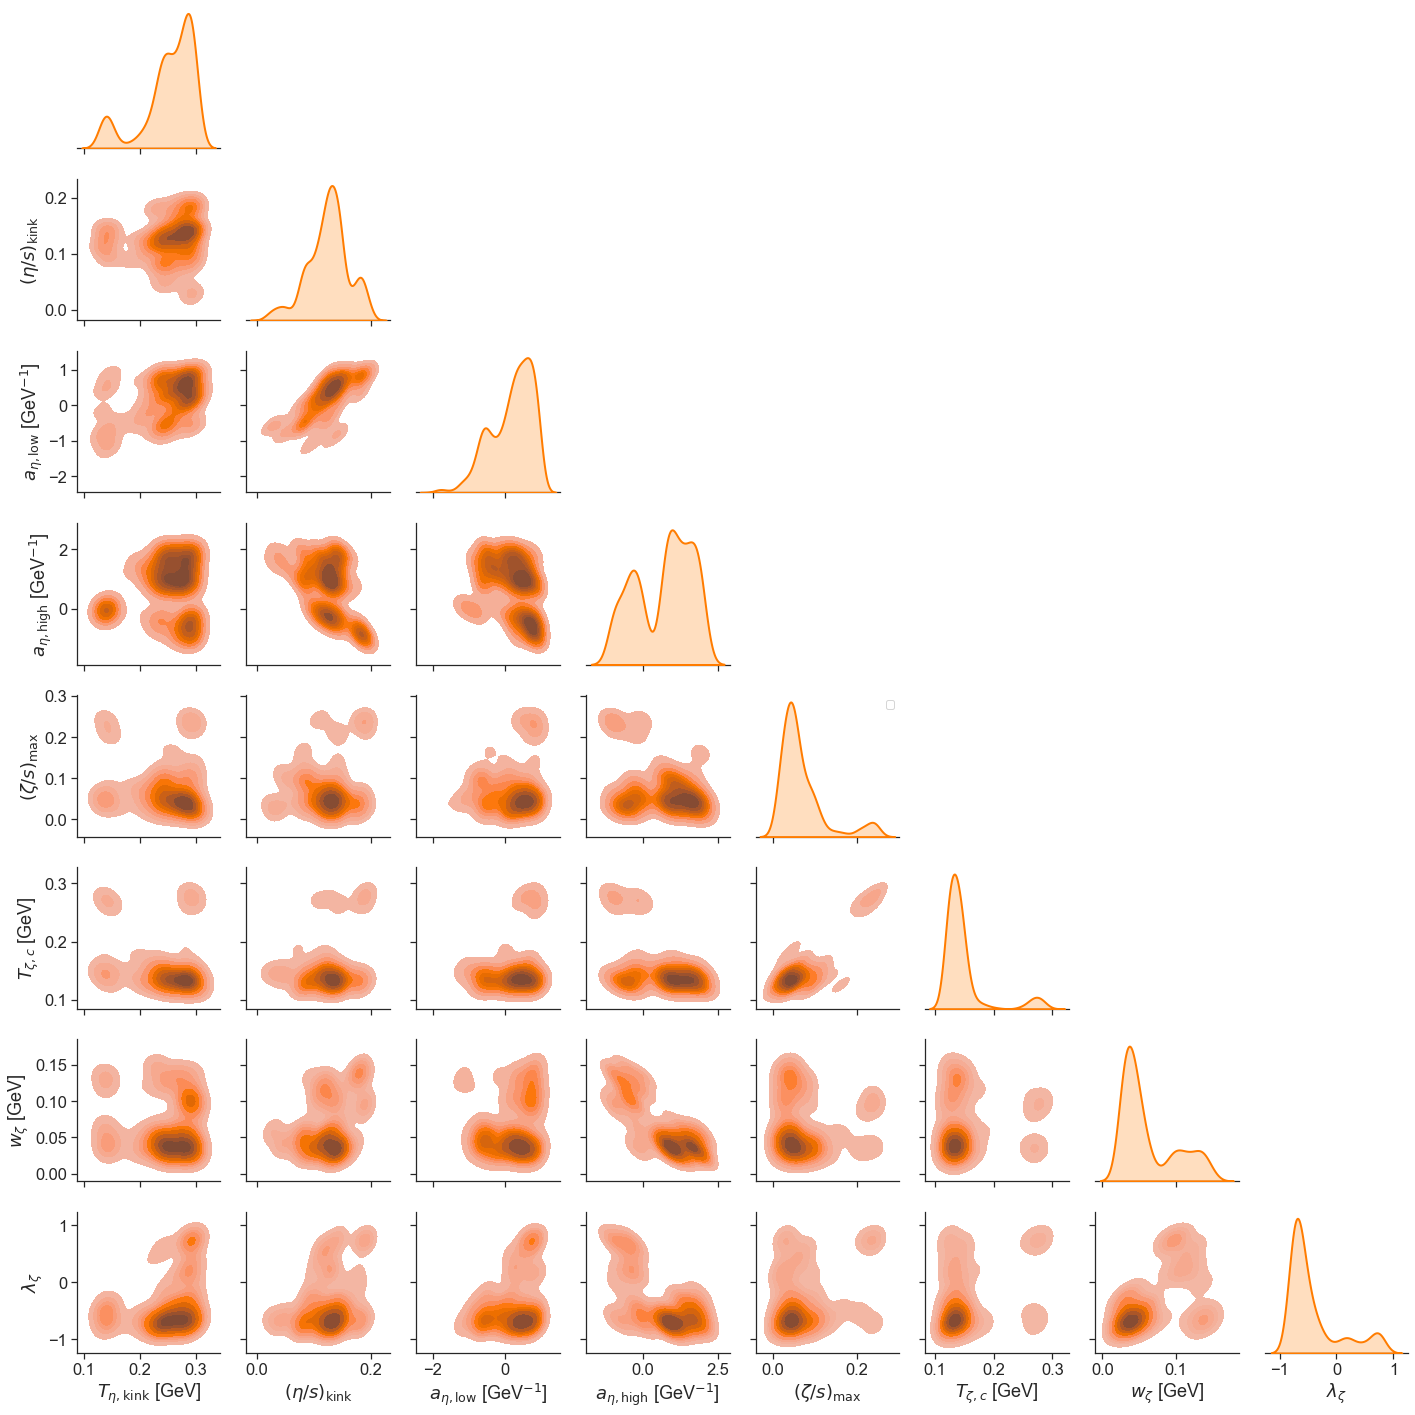

In [7]:
plot_corner_viscosity(post_df,'PCSK',1000,1)

No handles with labels found to put in legend.


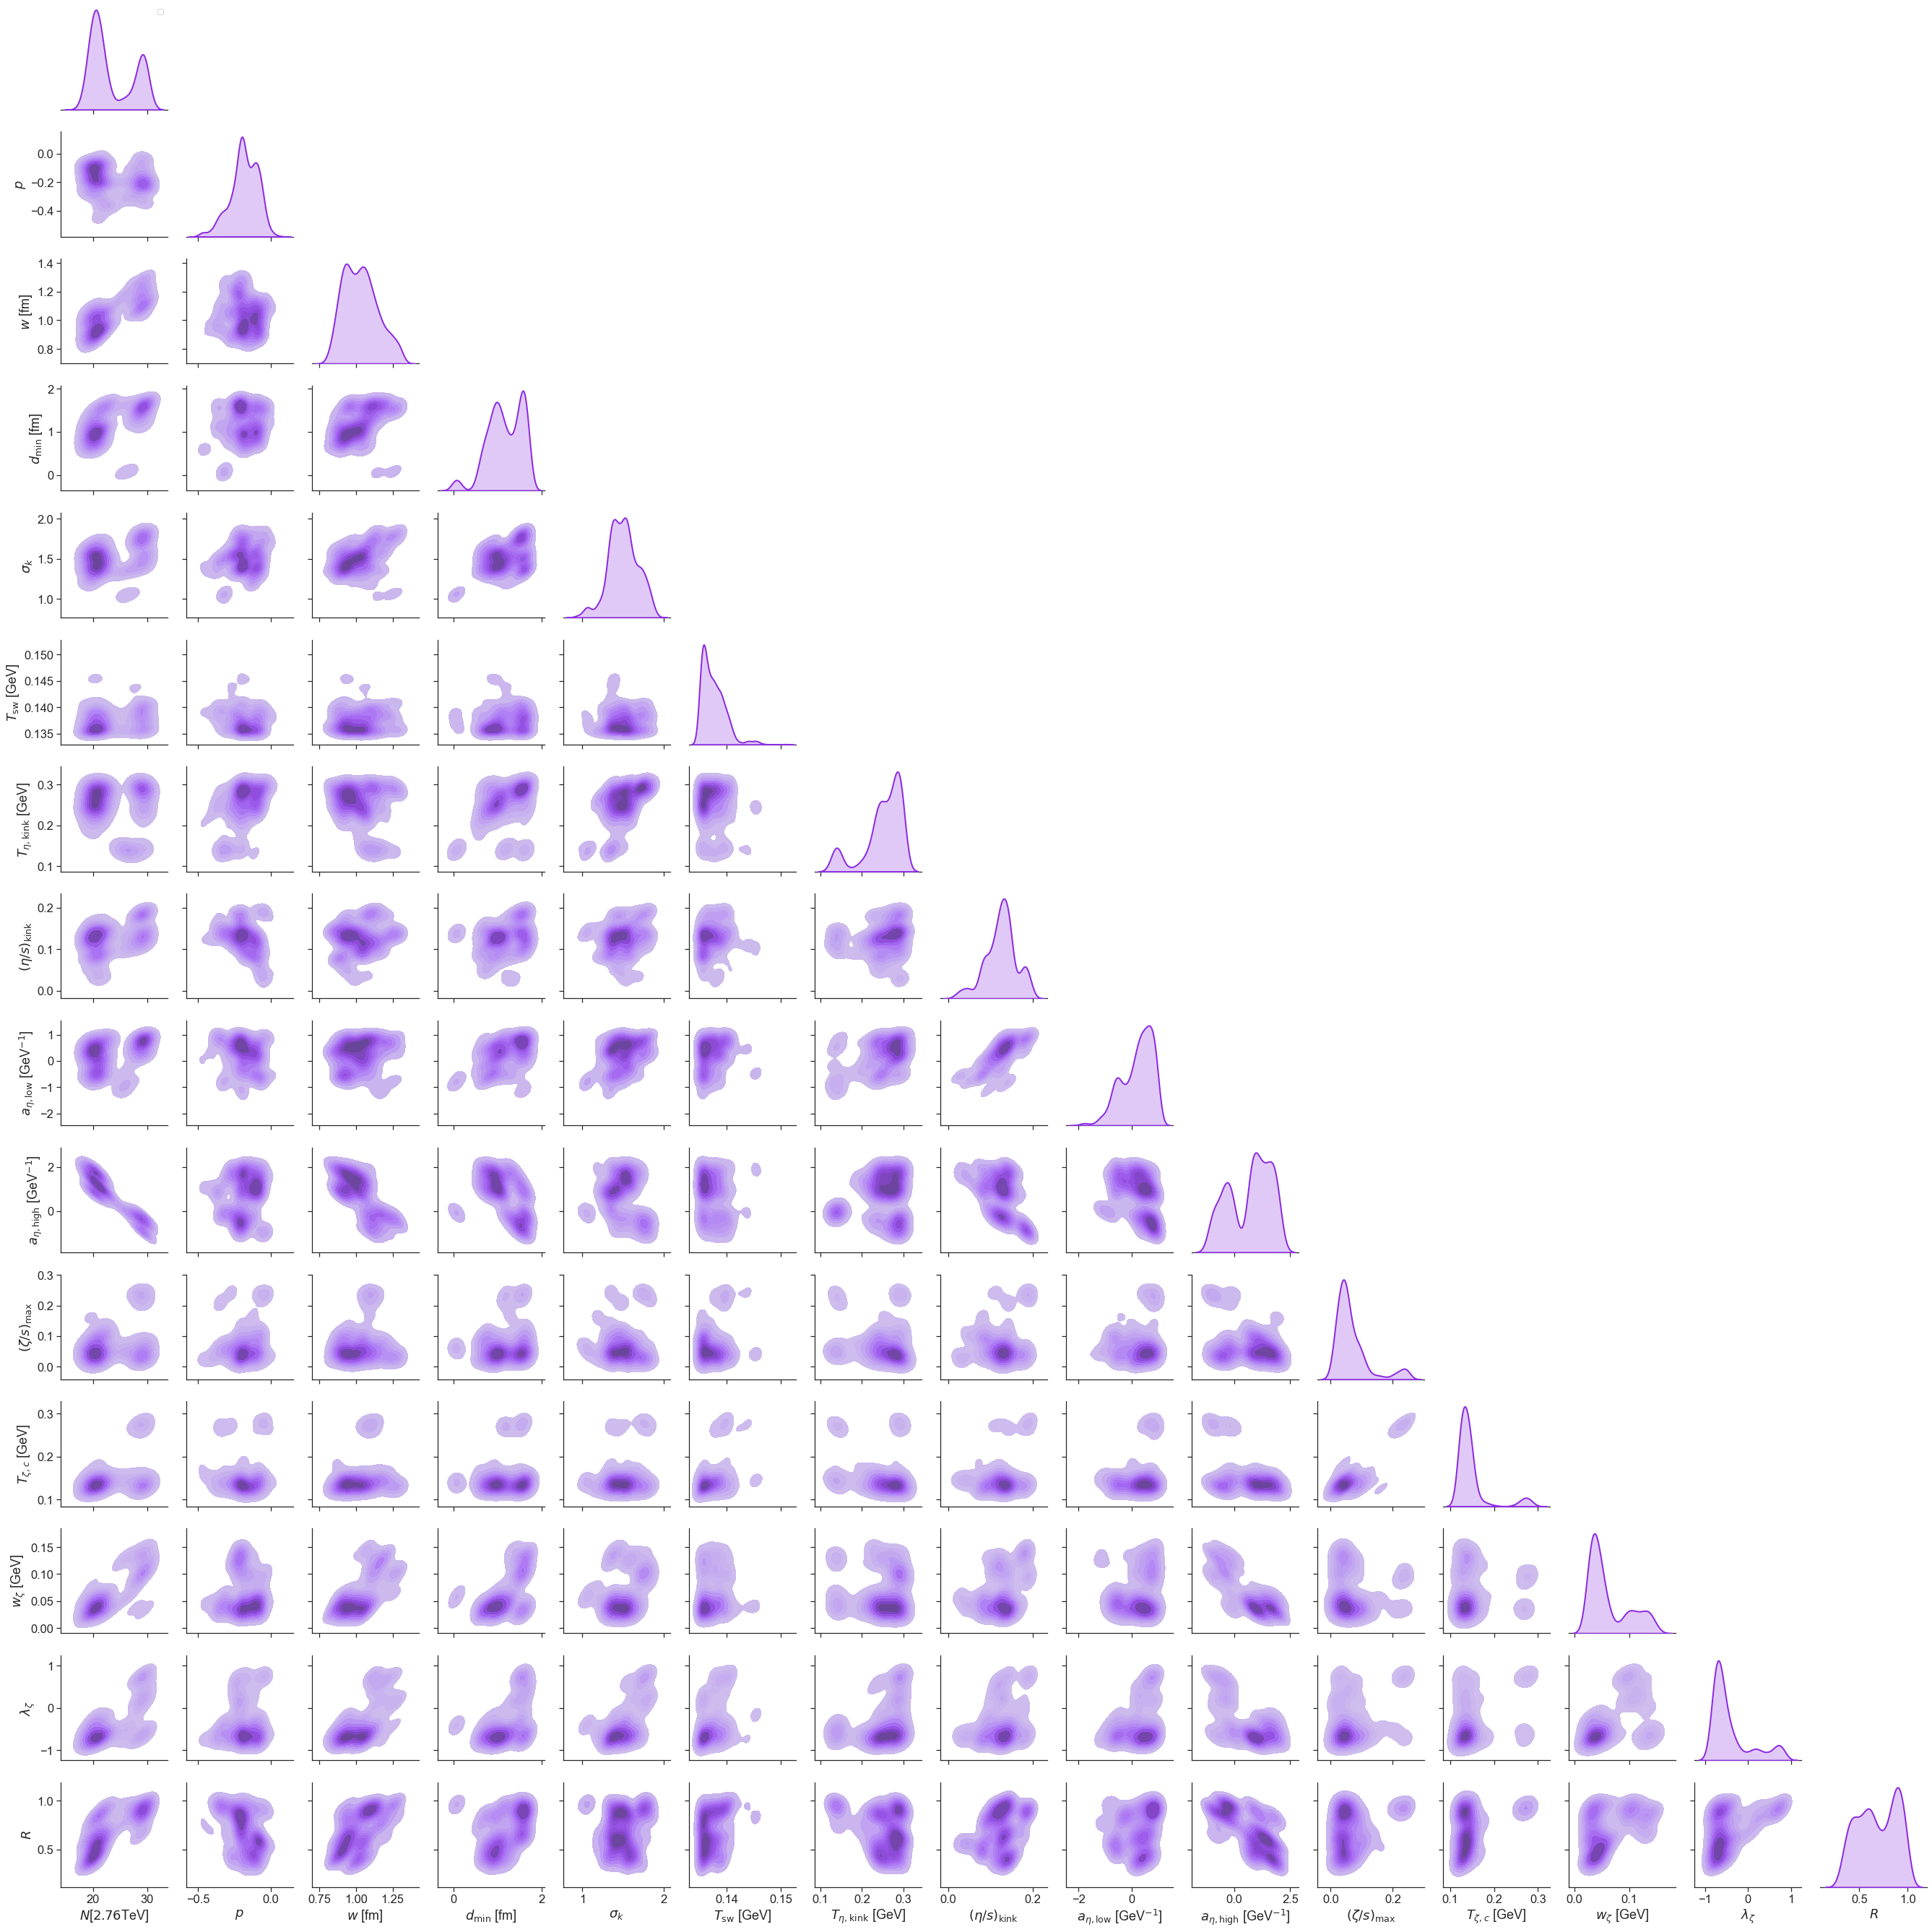

In [8]:
plot_corner_all(post_df,'PCSK',1000,1)

/Users/dananjayaliyanage/git/observables/vah_design/emulation/plotting.py:347: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.tight_layout()


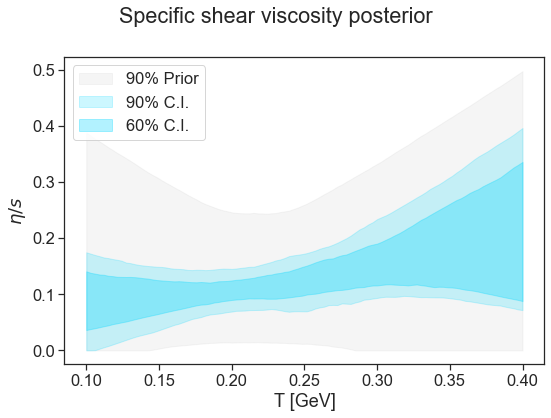

In [9]:
plot_shear(post_df,'PCSK',xlimits, 1000,1)

/Users/dananjayaliyanage/git/observables/vah_design/emulation/plotting.py:395: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.tight_layout()


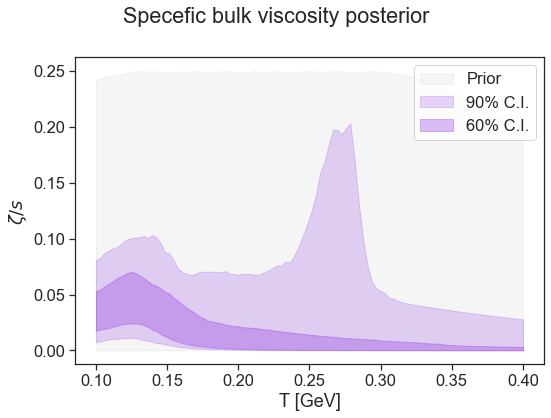

In [10]:
plot_bulk(post_df,'PCSK',xlimits, 1000,1)